In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,sex_dic,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1,26.0,0,0,111369,30.0000,C148,C


Survived 0==사망, 1==생존
Pclass 1==1등석, 2==2등석, 3==3등석
sibsp = 동승 형제의 수
Parch == 부모자식관계의 수
Fare == 표값
Cabin == 객실
Embarked == 승선지

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   sex_dic      891 non-null    int64  
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,sex_dic,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


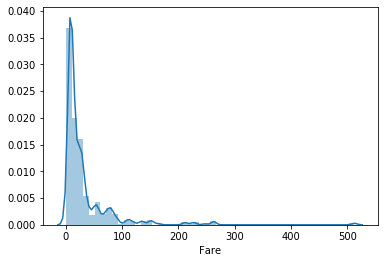

In [6]:
sns.distplot(titanic["Fare"])

In [7]:
titanic["New_Fare"] = np.log(titanic["Fare"]+1)

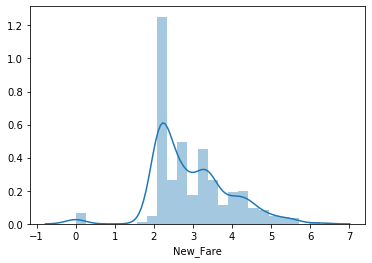

In [8]:
sns.distplot(titanic["New_Fare"])

In [9]:
titanic["age_decade"] = pd.cut(titanic["Age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 999],
                              labels=["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70+s"],
                              include_lowest=True) 

In [10]:
titanic["fare_category"] = pd.cut(titanic["Fare"], bins = [0, 50, 100, 150, 200, 250, 99999],
                              labels=["0s", "50s", "100s", "150s", "200s", "250+s"],
                              include_lowest=True) 

In [11]:
titanic["age_decade"]

0      20s
1      30s
2      20s
3      30s
4      30s
      ... 
886    20s
887    10s
888    NaN
889    20s
890    30s
Name: age_decade, Length: 891, dtype: category
Categories (8, object): [0s < 10s < 20s < 30s < 40s < 50s < 60s < 70+s]

In [12]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,sex_dic,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Fare,age_decade,fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213,20s,0s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C85,C,4.280593,30s,50s
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856,20s,0s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,35.0,1,0,113803,53.1000,C123,S,3.990834,30s,50s
4,5,0,3,"Allen, Mr. William Henry",male,1,35.0,0,0,373450,8.0500,NaN,S,2.202765,30s,0s


In [13]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coutts, Master. William Loch ""William""",male,1601,G6,S
freq,1,577,7,4,644


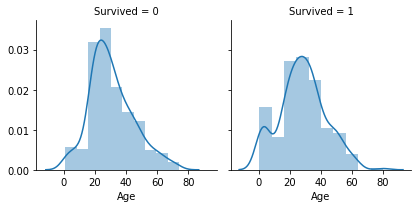

In [14]:
graph = sns.FacetGrid(titanic, col= "Survived")
graph.map(sns.distplot, "Age", bins=10)

In [15]:
titanic.groupby('age_decade')["Survived"].mean()

age_decade
0s      0.593750
10s     0.382609
20s     0.365217
30s     0.445161
40s     0.383721
50s     0.404762
60s     0.235294
70+s    0.200000
Name: Survived, dtype: float64

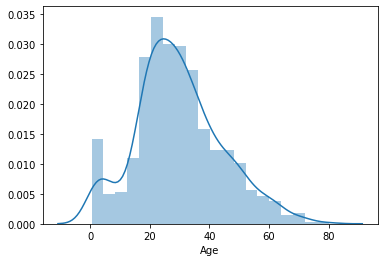

In [16]:
sns.distplot(titanic["Age"])

In [17]:
titanic["age_working"] = pd.cut(titanic["Age"], bins = [0, 24, 54, 64, 999],
                              labels=["Early", "Prime", "Mature", "Elderly"],
                              include_lowest=True) 

In [18]:
titanic.groupby("age_working")["Survived"].mean()

age_working
Early      0.425993
Prime      0.402532
Mature     0.387097
Elderly    0.090909
Name: Survived, dtype: float64

In [19]:
titanic.groupby('age_decade')["Fare"].mean()

age_decade
0s      30.434439
10s     29.529531
20s     28.306719
30s     42.496100
40s     41.163181
50s     44.774802
60s     45.910782
70+s    25.936680
Name: Fare, dtype: float64

In [20]:
titanic.groupby("age_working")["Fare"].mean()

age_working
Early      31.282942
Prime      36.032352
Mature     50.186016
Elderly    28.905691
Name: Fare, dtype: float64

In [21]:
titanic.groupby("fare_category")["Survived"].mean()

fare_category
0s       0.318741
50s      0.654206
100s     0.791667
150s     0.666667
200s     0.636364
250+s    0.777778
Name: Survived, dtype: float64

In [22]:
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
titanic.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [24]:
titanic.groupby(["Sex", "age_decade"])["Survived"].mean()

Sex     age_decade
female  0s            0.612903
        10s           0.739130
        20s           0.753086
        30s           0.836364
        40s           0.677419
        50s           0.928571
        60s           1.000000
        70+s               NaN
male    0s            0.575758
        10s           0.144928
        20s           0.154362
        30s           0.230000
        40s           0.218182
        50s           0.142857
        60s           0.071429
        70+s          0.200000
Name: Survived, dtype: float64

In [25]:
titanic.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

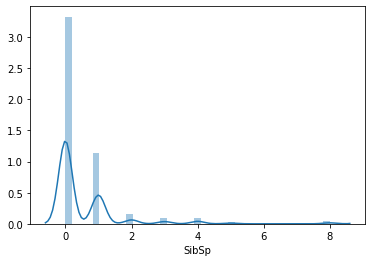

In [26]:
sns.distplot(titanic["SibSp"])

In [27]:
titanic.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [28]:
titanic.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [29]:
titanic.groupby("Embarked")["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [30]:
titanic.groupby(["Embarked"])["sex_dic"].mean()

Embarked
C    0.565476
Q    0.532468
S    0.684783
Name: sex_dic, dtype: float64

In [31]:
titanic.groupby("Cabin")["Fare"].mean().sort_values(ascending=False)

Cabin
B101               512.3292
C23 C25 C27        263.0000
B57 B59 B63 B66    262.3750
B51 B53 B55        258.6646
B58 B60            247.5208
                     ...   
F G73                7.6500
F G63                7.6500
A36                  0.0000
B94                  0.0000
B102                 0.0000
Name: Fare, Length: 147, dtype: float64

In [32]:
titanic.groupby(["fare_category","sex_dic"])["Survived"].mean()

fare_category  sex_dic
0s             0          0.665198
               1          0.162698
50s            0          0.943396
               1          0.370370
100s           0          1.000000
               1          0.444444
150s           0          0.714286
               1          0.500000
200s           0          1.000000
               1          0.000000
250+s          0          1.000000
               1          0.500000
Name: Survived, dtype: float64

In [33]:
titanic.groupby(["Pclass","sex_dic"])["Survived"].mean()

Pclass  sex_dic
1       0          0.968085
        1          0.368852
2       0          0.921053
        1          0.157407
3       0          0.500000
        1          0.135447
Name: Survived, dtype: float64

In [34]:
titanic.groupby(["Pclass"])["sex_dic"].mean()

Pclass
1    0.564815
2    0.586957
3    0.706721
Name: sex_dic, dtype: float64

In [35]:
titanic.groupby(["fare_category"])["sex_dic"].mean()

fare_category
0s       0.689466
50s      0.504673
100s     0.375000
150s     0.222222
200s     0.363636
250+s    0.444444
Name: sex_dic, dtype: float64

In [43]:
titanic2 = titanic.drop(["Cabin"], axis=1)

In [45]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   sex_dic        891 non-null    int64   
 6   Age            714 non-null    float64 
 7   SibSp          891 non-null    int64   
 8   Parch          891 non-null    int64   
 9   Ticket         891 non-null    object  
 10  Fare           891 non-null    float64 
 11  Embarked       889 non-null    object  
 12  New_Fare       891 non-null    float64 
 13  age_decade     714 non-null    category
 14  fare_category  891 non-null    category
 15  age_working    714 non-null    category
dtypes: category(3), float64(3), int64(6), object(4)
memory usage: 94.0+ KB


In [46]:
titanic2 = titanic2.dropna()

In [48]:
titanic2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,sex_dic,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Fare,age_decade,fare_category,age_working
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,S,2.110213,20s,0s,Early
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C,4.280593,30s,50s,Prime
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856,20s,0s,Prime


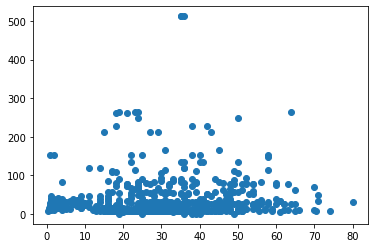

In [49]:
plt.scatter(titanic2["Age"], titanic2["Fare"])

In [50]:
np.corrcoef(titanic2["Age"], titanic2["Fare"])

array([[1.        , 0.09314252],
       [0.09314252, 1.        ]])

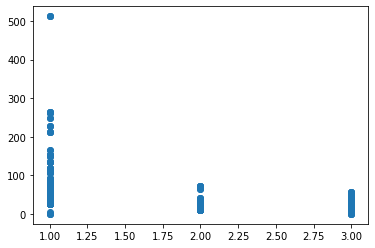

In [53]:
plt.scatter(titanic2["Pclass"], titanic2["Fare"])

In [54]:
np.corrcoef(titanic2["Pclass"], titanic2["Fare"])

array([[ 1.        , -0.55289322],
       [-0.55289322,  1.        ]])